In [749]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(17, 6))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

<Figure size 1224x432 with 0 Axes>

### Importando os dados

In [750]:
raw_use_of_force = pd.read_csv("./../use-of-force.csv")

#### Dados sem formatação

In [751]:
raw_use_of_force

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,NaN,-,NaN,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,NaN,-,NaN,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,NaN,-,NaN,2017,12130,White,Male
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,NaN,-,NaN,4759,15571,Black or African American,Male
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,NaN,-,NaN,4745,16299,White,Female
5,30638-2146-17272,30638,Level 1 - Use of Force,2018-07-21T18:58:00,NaN,-,NaN,2146,17272,White,Male
6,18081-1852-14330,18081,Level 1 - Use of Force,2017-11-14T12:56:00,NaN,-,NaN,1852,14330,NaN,Female
7,15097-704-12153,15097,Level 1 - Use of Force,2017-04-03T10:30:00,NaN,-,NaN,704,12153,Black or African American,Female
8,14270-1578-11649,14270,Level 1 - Use of Force,2017-01-26T16:30:00,NaN,-,NaN,1578,11649,White,Male
9,15097-704-11880,15097,Level 1 - Use of Force,2017-04-03T10:30:00,NaN,-,NaN,704,11880,Black or African American,Male


### Data Cleaning

In [752]:
# 1 - Substituir o sinal "-" pelo "nan" que tem um melhor desempenho para computar valores faltosos

raw_use_of_force.loc[raw_use_of_force.Sector == '-', 'Sector'] = np.nan

In [753]:
# 2 - Converter do campo de data do tipo string para o tipo datetime

raw_use_of_force['Occured_date_time'] = pd.to_datetime(raw_use_of_force['Occured_date_time'])

In [754]:
# 3 - Analisando os dados percebemos que delegacia S tem dados do setor U, mas o setor U pertence apenas a delegacia N,
# vamos então alterar o valor da delegacia de S para N para este setor.

raw_use_of_force.loc[(raw_use_of_force['Sector'] == 'U') & (raw_use_of_force['Precinct'] == 'S'),
                                        'Precinct'] = 'N'

In [755]:
# 4 - Também é possível perceber que existe uma delagacia sobresalente (X), esta delagacia não é mencionada pelo departamento 
# de Seattle, então vamos excluí-la.

raw_use_of_force = raw_use_of_force[raw_use_of_force['Precinct'] != 'X']

## Análise Exploratória de Dados

###### 1. Como é a distribuição do uso de força dentre as delegacias e os setores? Em cada setor, qual o *beat* com maior número de incidentes? Apresente também o ranking dos setores segundo o percentual de incidentes "Level 2" em relação ao total de incidentes do respectivo setor.

### Uso da força por delegacia

In [811]:
precinct_groupby = raw_use_of_force.groupby('Precinct').count() 

In [812]:
raw_use_of_force.groupby('Precinct').count() 

,ID,Incident_Num,Incident_Type,Occured_date_time,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
Precinct,,,,,,,,,,
E,1434,1434,1434,1434,1434,1434,1434,1434,1150,1376
N,1836,1836,1836,1836,1836,1836,1836,1836,1627,1812
S,1346,1346,1346,1346,1346,1346,1346,1346,1110,1343
SW,480,480,480,480,480,480,480,480,419,475
W,2015,2015,2015,2015,2015,2015,2015,2015,1679,1923


In [813]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o campo Incidente_Num para Quantity e foram ordenados os dados.

precinct_groupby = precinct_groupby[['Incident_Num']]
precinct_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
precinct_groupby.sort_values(by='Quantity', ascending=False ,inplace=True)
precinct_groupby

,Quantity
Precinct,
W,2015
N,1836
E,1434
S,1346
SW,480


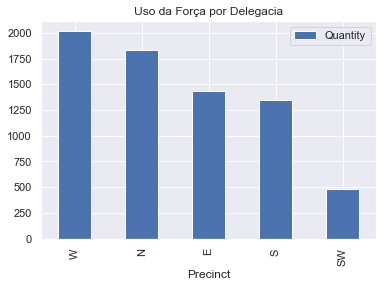

In [814]:
precinct_groupby.plot(kind='bar', title='Uso da Força por Delegacia')

###  Uso da força por setor

In [761]:
sector_groupby = raw_use_of_force.groupby(['Precinct', 'Sector']).count()

In [762]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o campo Incidente_Num para Quantity e foram ordenados os dados.

sector_groupby = sector_groupby[['Incident_Num']]
sector_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
sector_groupby.sort_values(by='Quantity', ascending=False, inplace=True)

In [763]:
sector_groupby

,,Quantity
Precinct,Sector,
E,E,818
W,K,782
S,S,576
N,N,537
W,D,530
S,R,514
W,M,496
E,G,420
N,U,373


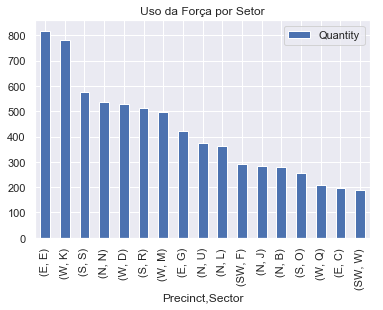

In [764]:
sector_groupby.plot(kind='bar', title='Uso da Força por Setor')

### Uso da força por beat

In [765]:
beat_groupby = raw_use_of_force.groupby(['Precinct', 'Sector', 'Beat']).count()

In [766]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o campo Incidente_Num para Quantity

beat_groupby = beat_groupby[['Incident_Num']]
beat_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
beat_groupby.reset_index(inplace=True)

# Selecionado apenas o beat com maior número de incidentes, atualizando os índices do dataframe e foram ordernados os dados

beat_groupby_max = beat_groupby.groupby('Sector').max()
beat_groupby_max.reset_index(inplace=True)
beat_groupby_max = beat_groupby_max.set_index(['Precinct', 'Sector', 'Beat'])
beat_groupby_max.sort_values(by='Quantity', ascending=False, inplace=True)
beat_groupby_max

Quantity
Precinct Sector Beat          
E        E      E3         469
W        K      K3         297
N        N      N3         266
S        S      S3         238
         R      R3         234
W        D      D3         234
         M      M3         180
E        G      G3         161
N        U      U3         150
         L      L3         148
S        O      O3         125
SW       F      F3         118
N        J      J3         117
         B      B3         115
W        Q      Q3          82
SW       W      W3          79
E        C      C3          74

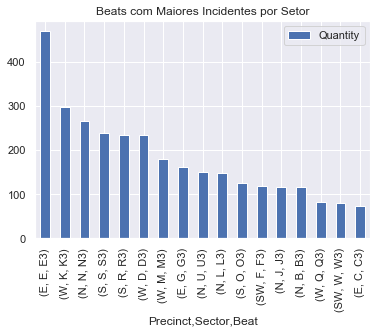

In [767]:
# Beats com maiores incidentes por Setor
beat_groupby_max.plot(kind='bar', title='Beats com Maiores Incidentes por Setor')

### Rank por Setor

In [770]:
sector_incident_type = raw_use_of_force.groupby(['Precinct', 'Sector', 'Incident_Type'])['Incident_Num'].count()

In [771]:
sector_incidente_percent = sector_incident_type.groupby(level=1).apply(lambda x: x * 100/ x.sum()).reset_index()

In [772]:
# Selecionando apenas incidentes do level 2, renomeando o campo e odernando o dataframe

is_level_2 = sector_incidente_percent['Incident_Type'] == 'Level 2 - Use of Force'
sector_incidente_percent = sector_incidente_percent[is_level_2]
sector_incidente_percent.rename(columns={'Incident_Num': 'Percent'}, inplace=True)
sector_incidente_percent.sort_values(by='Percent', ascending=False, inplace=True)
sector_incidente_percent.set_index(['Precinct', 'Sector'], inplace=True)
sector_incidente_percent

Incident_Type    Percent
Precinct Sector                                   
W        M       Level 2 - Use of Force  39.516129
N        B       Level 2 - Use of Force  33.214286
W        D       Level 2 - Use of Force  33.207547
E        E       Level 2 - Use of Force  31.051345
         G       Level 2 - Use of Force  30.714286
W        K       Level 2 - Use of Force  28.260870
N        U       Level 2 - Use of Force  22.252011
SW       F       Level 2 - Use of Force  21.501706
S        R       Level 2 - Use of Force  21.206226
E        C       Level 2 - Use of Force  19.897959
N        L       Level 2 - Use of Force  19.780220
S        O       Level 2 - Use of Force  18.750000
W        Q       Level 2 - Use of Force  18.357488
S        S       Level 2 - Use of Force  17.361111
SW       W       Level 2 - Use of Force  14.438503
N        N       Level 2 - Use of Force  14.338920
         J       Level 2 - Use of Force  13.829787

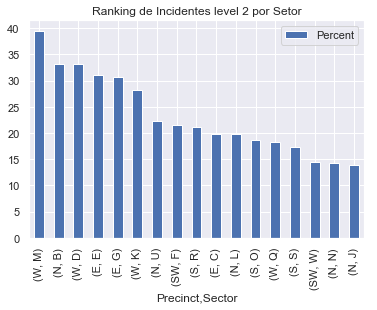

In [810]:
sector_incidente_percent.plot(kind='bar', title='Ranking de Incidentes level 2 por Setor')
plt.ylabel='Percent'

##### 2. Com relação à distribuição dos incidentes no tempo, é possível encontrar picos ou linhas de tendência dentro dos dias, dos meses, das semanas ou dos anos?

### Incidentes por dia

In [821]:
incident_date_day = raw_use_of_force.copy()

In [ ]:
# Foi obtido apenas a data sem o horário e agrupado por esse campo

incident_date_day['date'] = pd.to_datetime(incident_date_day['Occured_date_time']).dt.to_period('D')
incident_date_day = incident_date_day.groupby(['date']).count()

# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o compo Incident_Num para Quantity e os dados foram ordenados

incident_date_day = incident_date_day[['Incident_Num']]
incident_date_day.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
#incident_date_day.sort_values(by='Quantity', inplace=True)
incident_date_day

###### Incidentes por ano-mês

In [779]:
incident_date_year_month = raw_use_of_force.copy()

In [780]:
incident_date_year_month['year_month'] = incident_date_year_month['Occured_date_time'].dt.to_period('M')

In [781]:
incident_date_year_month = incident_date_year_month.groupby(['year_month']).count()

In [782]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_year_month = incident_date_year_month[['Incident_Num']]
incident_date_year_month.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

In [783]:
incident_date_year_month

,Quantity
year_month,
2014-01,1
2014-02,1
2014-03,8
2014-04,233
2014-05,252
2014-06,173
2014-07,188
2014-08,157
2014-09,152


###### Incidentes por semana

In [784]:
incident_date_week = raw_use_of_force.copy()

In [785]:
incident_date_week['week'] = pd.to_datetime(incident_date_week['Occured_date_time']).dt.to_period('W')

In [786]:
incident_date_week = incident_date_week.groupby(['week']).count()

In [787]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_week = incident_date_week[['Incident_Num']]
incident_date_week.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

In [788]:
incident_date_week

,Quantity
week,
2014-01-27/2014-02-02,1
2014-02-24/2014-03-02,1
2014-03-10/2014-03-16,6
2014-03-17/2014-03-23,2
2014-03-31/2014-04-06,55
2014-04-07/2014-04-13,32
2014-04-14/2014-04-20,79
2014-04-21/2014-04-27,40
2014-04-28/2014-05-04,127


###### Incidentes por ano

In [789]:
incident_date_year = raw_use_of_force.copy()

In [790]:
incident_date_year['year'] = pd.to_datetime(incident_date_year['Occured_date_time']).dt.to_period('Y')

In [791]:
incident_date_year = incident_date_year.groupby(['year']).count()

In [792]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_year = incident_date_year[['Incident_Num']]
incident_date_year.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

In [793]:
incident_date_year

,Quantity
year,
2014,1615
2015,1940
2016,1477
2017,1526
2018,1160


##### 3. A polícia deseja dar início a uma investigação interna para verificar se existem policiais excessivamente violentos. No entanto, o prazo para o término desta investigação é bastante limitado. Elabore um script capaz de elencar os policiais em ordem decrescente de chance de violência excessiva com base no número de incidentes dos quais eles participaram.



In [794]:
incident_office = raw_use_of_force.groupby(['Officer_ID'])['Incident_Num'].count()

In [795]:
incident_office = incident_office.reset_index()

In [796]:
incident_office['percentage'] = incident_office['Incident_Num'] * 100/incident_office['Incident_Num'].sum()

In [797]:
incident_office.sort_values(by='percentage', ascending=False)

,Officer_ID,Incident_Num,percentage
81,456,74,0.958798
609,1697,45,0.583053
484,1559,44,0.570096
715,1807,41,0.531226
661,1750,41,0.531226
684,1775,40,0.518269
123,612,39,0.505312
422,1239,37,0.479399
646,1735,37,0.479399
701,1792,36,0.466442


###### 4. Uma métrica interessante para a polícia é o grau de reincidência por parte dos civis. Apresente o percentual de casos reincidentes em relação ao total de incidentes em cada setor e verifique se há correlação entre esta métrica e o percentual de incidentes "Level 2" calculado na questão 1. Que interpretação pode ser dada a este resultado?

In [798]:
incident_sector_subject = raw_use_of_force.groupby(['Precinct', 'Sector', 'Subject_ID']).count()

In [799]:
incident_sector_subject = incident_sector_subject[['Incident_Num']]

In [800]:
incident_sector_subject.loc[incident_sector_subject['Incident_Num'] >= 2, 'Repeated'] = True

In [801]:
incident_sector_subject.loc[incident_sector_subject['Incident_Num'] == 1, 'Repeated'] = False

In [802]:
incident_sector_subject

Incident_Num  Repeated
Precinct Sector Subject_ID                        
E        C      169                    1     False
                170                    1     False
                171                    1     False
                203                    1     False
                375                    3      True
                386                    1     False
                541                    1     False
                613                    2      True
                742                    3      True
                746                    1     False
                889                    3      True
                1151                   1     False
                1257                   2      True
                1356                   1     False
                1357                   2      True
                1381                   1     False
                1511                   1     False
                1611                   2      True
                1722                   1     False
                2036                   1     False
                2416                   1     False
                2417                   1     False
                2457                   2      True
                2738                   2      True
                2783                   8      True
                2852                   1     False
                2884                   1     False
                3074                   1     False
                3275                   1     False
                3287                   2      True
...                                  ...       ...
W        Q      12285                  1     False
                12355                  1     False
                12447                  1     False
                12572                  4      True
                12575                  1     False
                12600                  2      True
                12604                  1     False
                12605                  1     False
                12626                  1     False
                12901                  3      True
                13119                  1     False
                13185                  2      True
                13323                  1     False
                13568                  3      True
                13774                  3      True
                13775                  2      True
                14312                  1     False
                14457                  1     False
                14468                  1     False
                14507                  1     False
                14881                  1     False
                14891                  1     False
                15383                  1     False
                15429                  1     False
                15726                  1     False
                15951                  1     False
                15968                  1     False
                16182                  2      True
                16428                  1     False
                16755                  1     False

[4456 rows x 2 columns]

In [803]:
incident_sector_subject_count = incident_sector_subject.groupby(['Precinct', 'Sector', 'Repeated']).count()

In [804]:
incident_sector_subject_count = incident_sector_subject_count.groupby(level=1).apply(lambda x: x * 100/ x.sum())

In [805]:
incident_sector_subject_count

Incident_Num
Precinct Sector Repeated              
E        C      False        71.851852
                True         28.148148
         E      False        66.940452
                True         33.059548
         G      False        60.493827
                True         39.506173
N        B      False        66.666667
                True         33.333333
         J      False        66.666667
                True         33.333333
         L      False        62.995595
                True         37.004405
         N      False        73.295455
                True         26.704545
         U      False        62.135922
                True         37.864078
S        O      False        68.902439
                True         31.097561
         R      False        74.712644
                True         25.287356
         S      False        72.609819
                True         27.390181
SW       F      False        68.508287
                True         31.491713
         W      False        61.538462
                True         38.461538
W        D      False        70.000000
                True         30.000000
         K      False        66.737740
                True         33.262260
         M      False        67.987805
                True         32.012195
         Q      False        69.629630
                True         30.370370

In [806]:
sector_incidente_percent.reset_index()

,Precinct,Sector,Incident_Type,Percent
0,W,M,Level 2 - Use of Force,39.516129
1,N,B,Level 2 - Use of Force,33.214286
2,W,D,Level 2 - Use of Force,33.207547
3,E,E,Level 2 - Use of Force,31.051345
4,E,G,Level 2 - Use of Force,30.714286
5,W,K,Level 2 - Use of Force,28.260870
6,N,U,Level 2 - Use of Force,22.252011
7,SW,F,Level 2 - Use of Force,21.501706
8,S,R,Level 2 - Use of Force,21.206226
9,E,C,Level 2 - Use of Force,19.897959
